### Install Libraries

In [32]:
install.packages("patchwork")
install.packages("caret")
install.packages("MLmetrics")
install.packages("themis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Import Libraries

In [34]:
library(tidyverse)
library(repr)
library(patchwork)
library(caret)
library(MLmetrics)
library(themis)
library(ROSE)

### Explore Data

In [3]:
# import data
df <- read_csv('Stroke_Prediction.csv')
head(df)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


In [4]:
# manipulation of data for a required form

# convert the bmi variable into double
df$bmi[df$bmi == 'N/A'] <- NA     # missing values
df$bmi <- as.double(df$bmi)

# convert some variables into factors
toFactor <- character()

for (col in 1:ncol(df)) {
  if (typeof(df[[col]]) == "character") {
    toFactor <- append(toFactor, colnames(df[col]))
  }
}

for (col in toFactor) {
  df[col] <- factor(df[[col]])
}


df$stroke <- factor(df$stroke, 
                    levels = c(0, 1), 
                    labels = c("No_Stroke", "Stroke"))

df$hypertension <- factor(df$hypertension, 
                    levels = c(0, 1), 
                    labels = c("No_History", "History"))

df$heart_disease <- factor(df$heart_disease, 
                          levels = c(0, 1), 
                          labels = c("No_History", "History"))

In [5]:
# summary of dataset
summary(df)

       id           gender          age            hypertension 
 Min.   :   67   Female:2994   Min.   : 0.08   No_History:4612  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   History   : 498  
 Median :36932   Other :   1   Median :45.00                    
 Mean   :36518                 Mean   :43.23                    
 3rd Qu.:54682                 3rd Qu.:61.00                    
 Max.   :72940                 Max.   :82.00                    
                                                                
    heart_disease  ever_married         work_type    Residence_type
 No_History:4834   No :1757     children     : 687   Rural:2514    
 History   : 276   Yes:3353     Govt_job     : 657   Urban:2596    
                                Never_worked :  22                 
                                Private      :2925                 
                                Self-employed: 819                 
                                                                   
    

### Data visulization

In [6]:
# a function to change figure sizes
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

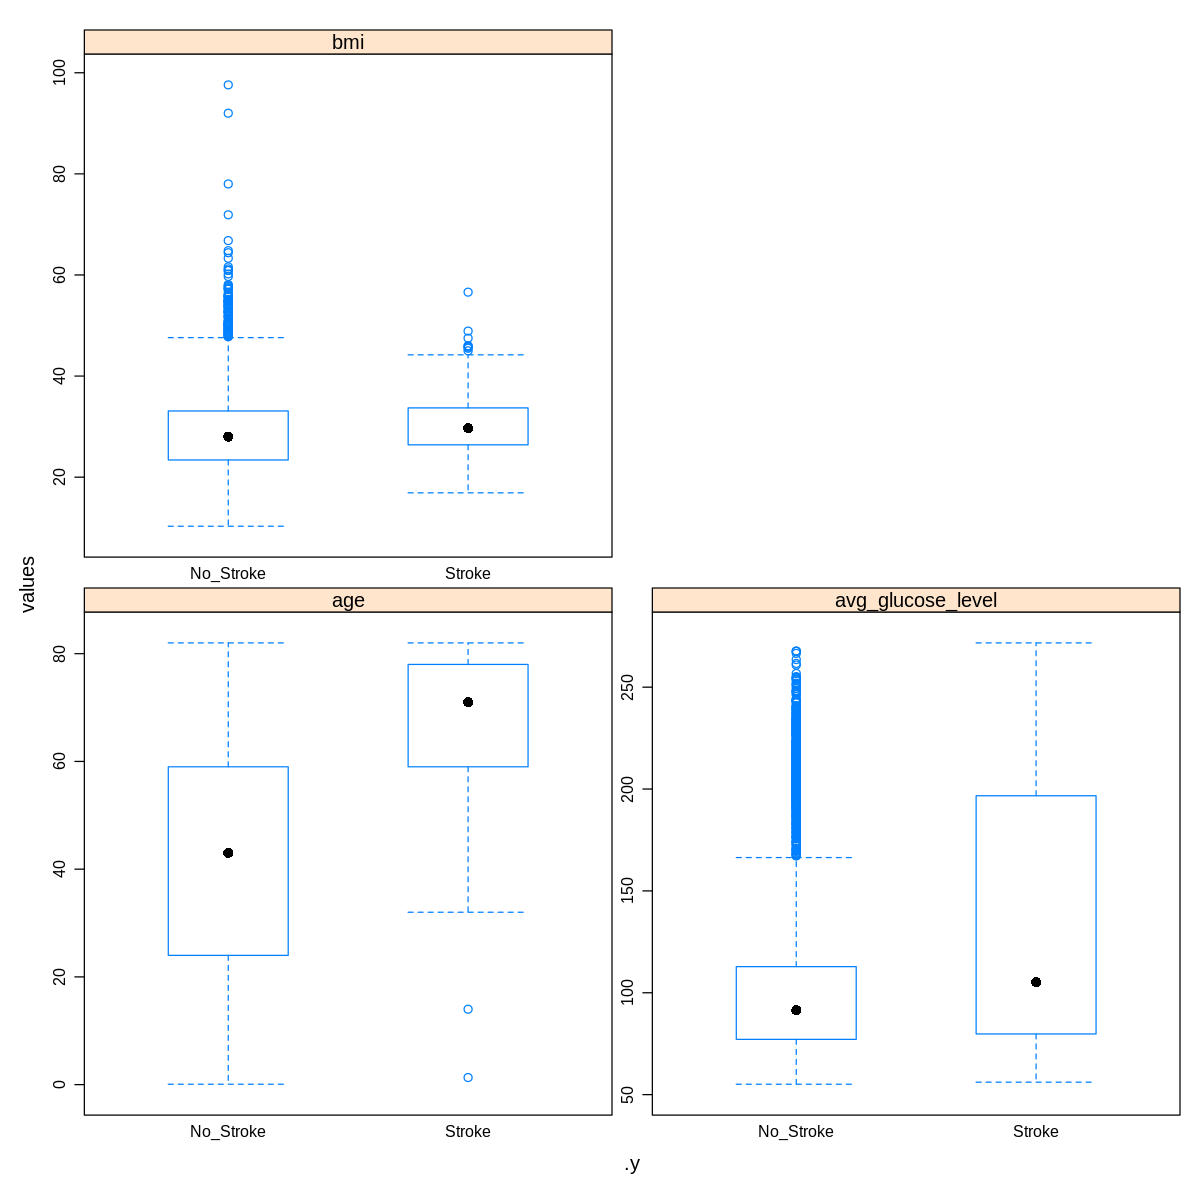

In [15]:
# Visualization of feature distribution
# feature plot using a density plot
featurePlot(x = df[,c("age", "avg_glucose_level", "bmi")],
            y = df$stroke,
            plot = "box",
            #strip = strip.custom(par.strip.text=list(cex=.7)),
            scale = list(x=list(relation="free"),
                         y=list(relation="free")),
            fig(10, 10))

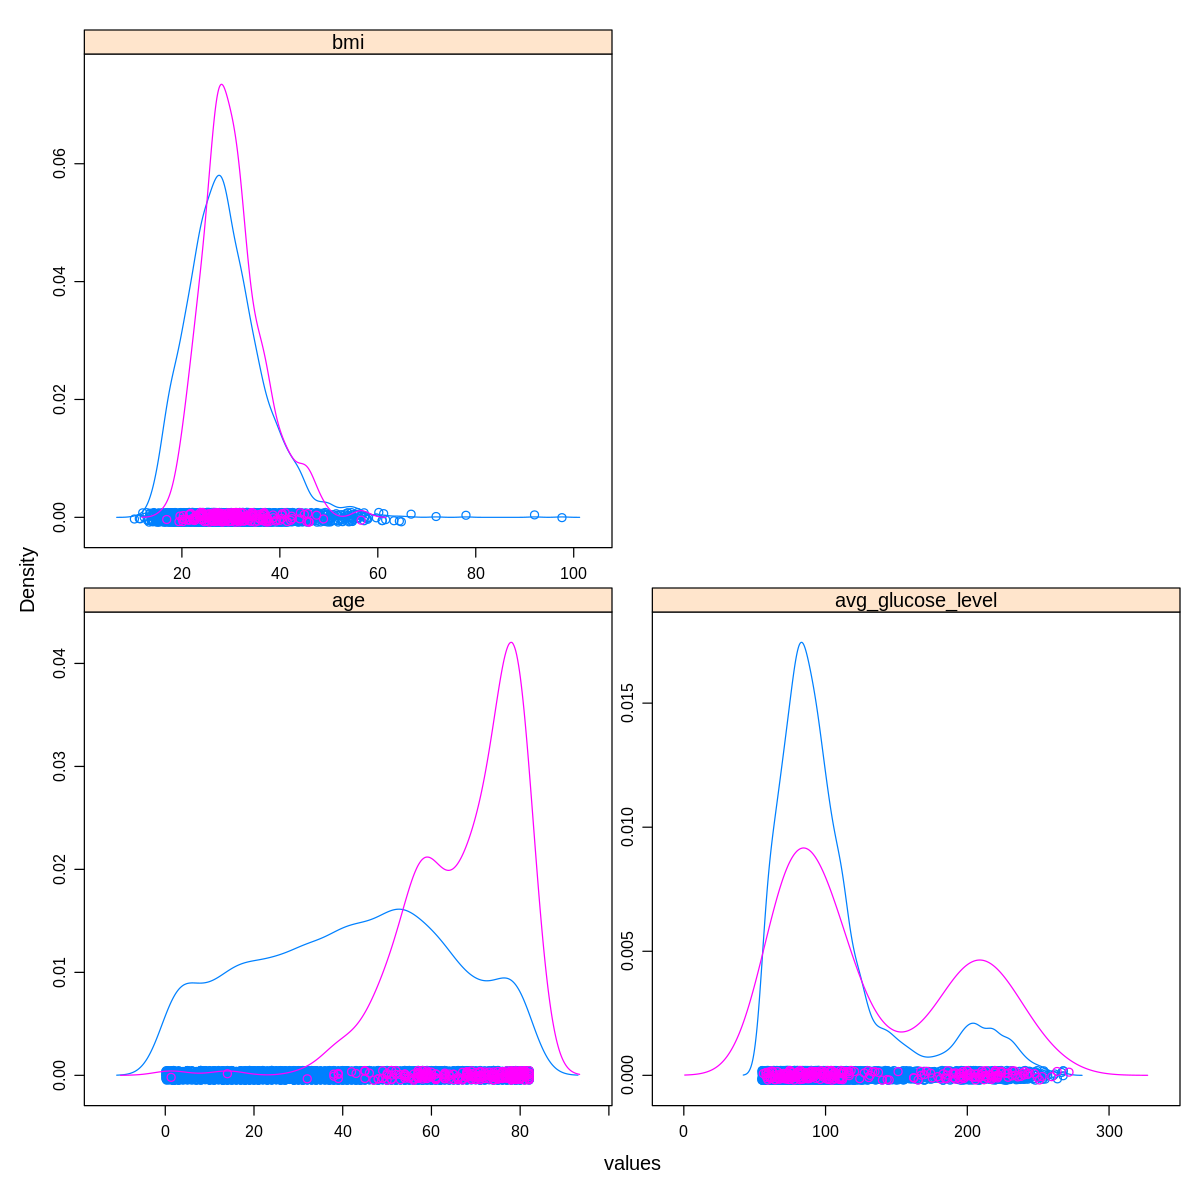

In [21]:
# feature plot using a density plot
featurePlot(x = df[,c("age", "avg_glucose_level", "bmi")],
            y = df$stroke,
            plot = "density",
            strip = strip.custom(par.strip.text=list(cex=1)),
            scale = list(x=list(relation="free"),
                         y=list(relation="free")),
            fig(10, 10))

In [22]:
# split the data into 'Stroke' and 'No-Stroke'
str_only <- df %>% 
  filter(stroke == "Stroke")

no_str_only <- df %>% 
  filter(stroke == "No_Stroke")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


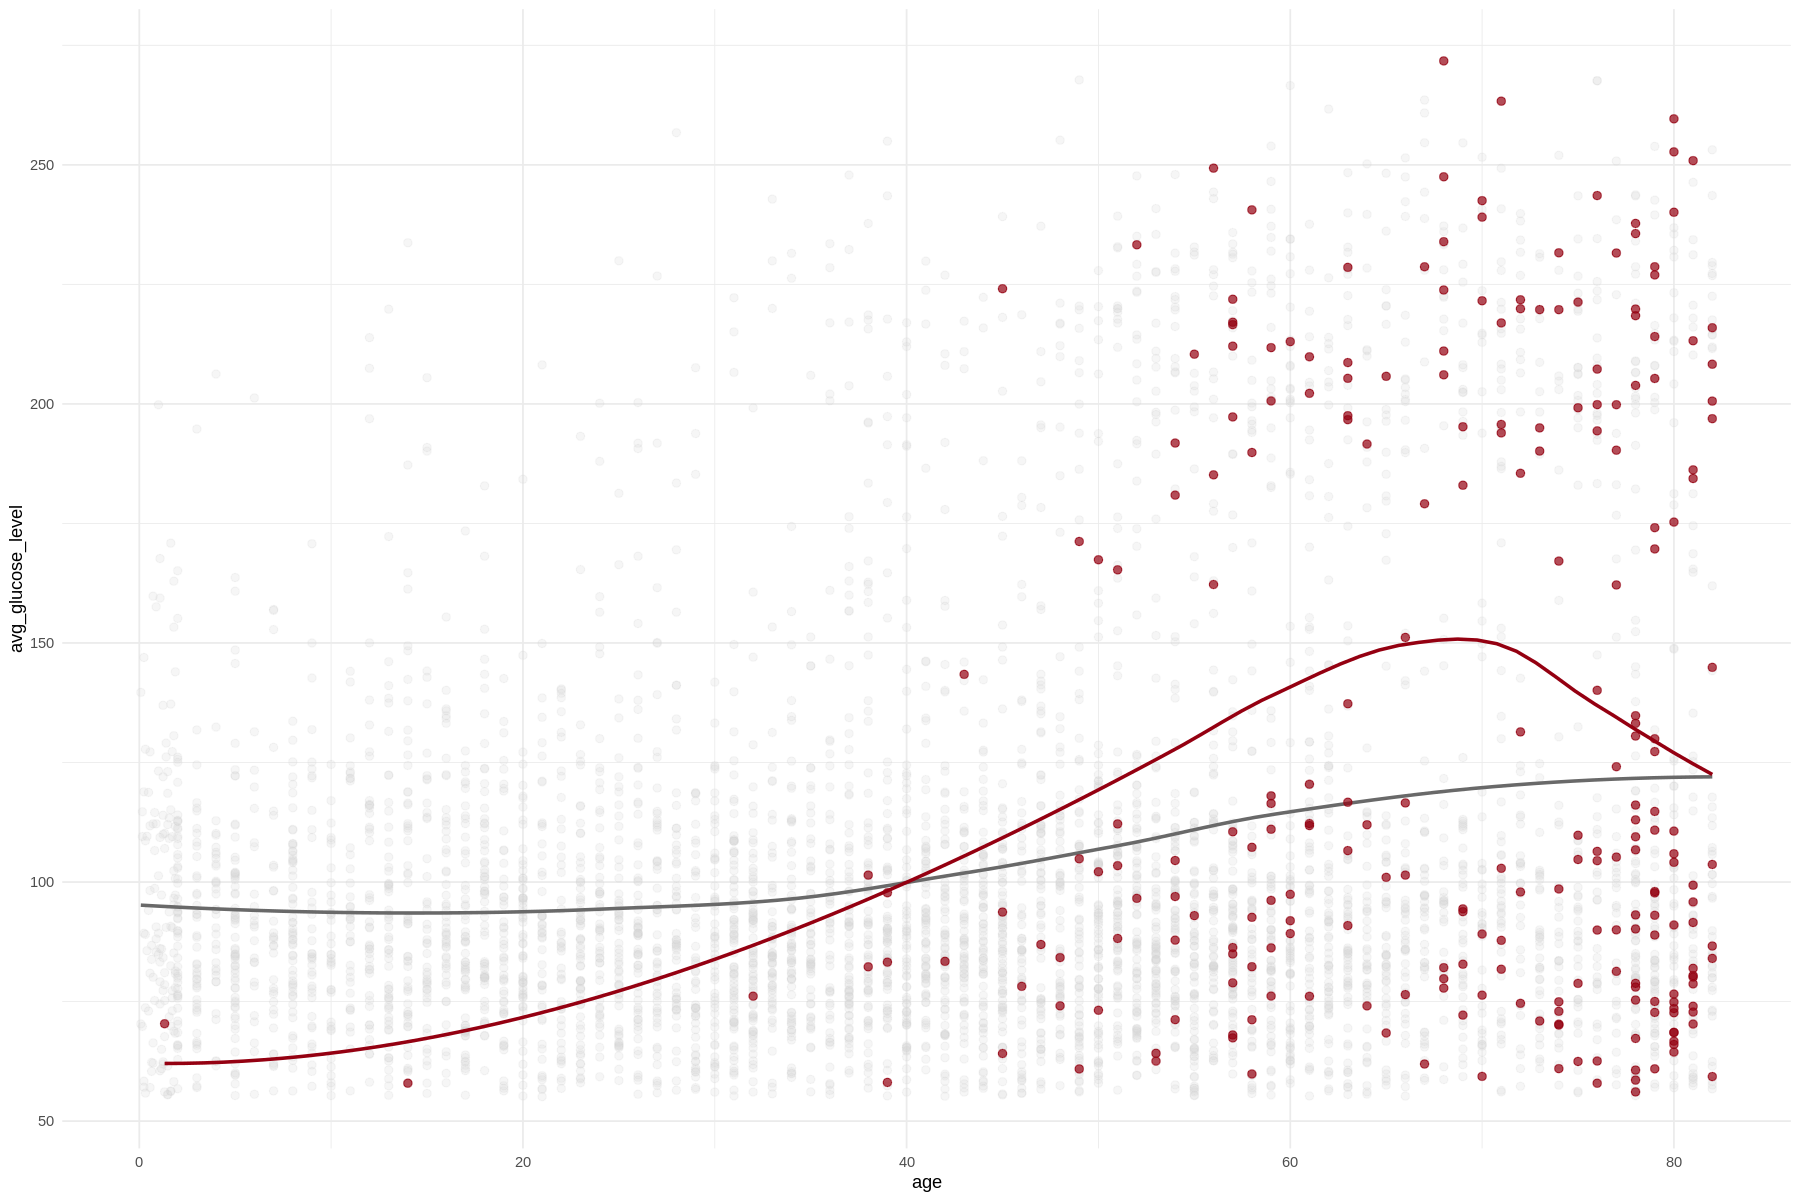

In [25]:
# glucose
ggplot(no_str_only, aes(age, avg_glucose_level), fig(15, 10)) +
  geom_point(size = 2,
             alpha = 0.2,
             color = "lightgrey") +
  geom_smooth(method = "loess",
              se = FALSE,
              color = "dimgrey") +
  geom_point(data = str_only, 
             size = 2,
             alpha = 0.7,
             color="#940011") +
  geom_smooth(data = str_only,
              method = "loess",
              se = FALSE,
              color = "#940011") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 161 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 40 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 161 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


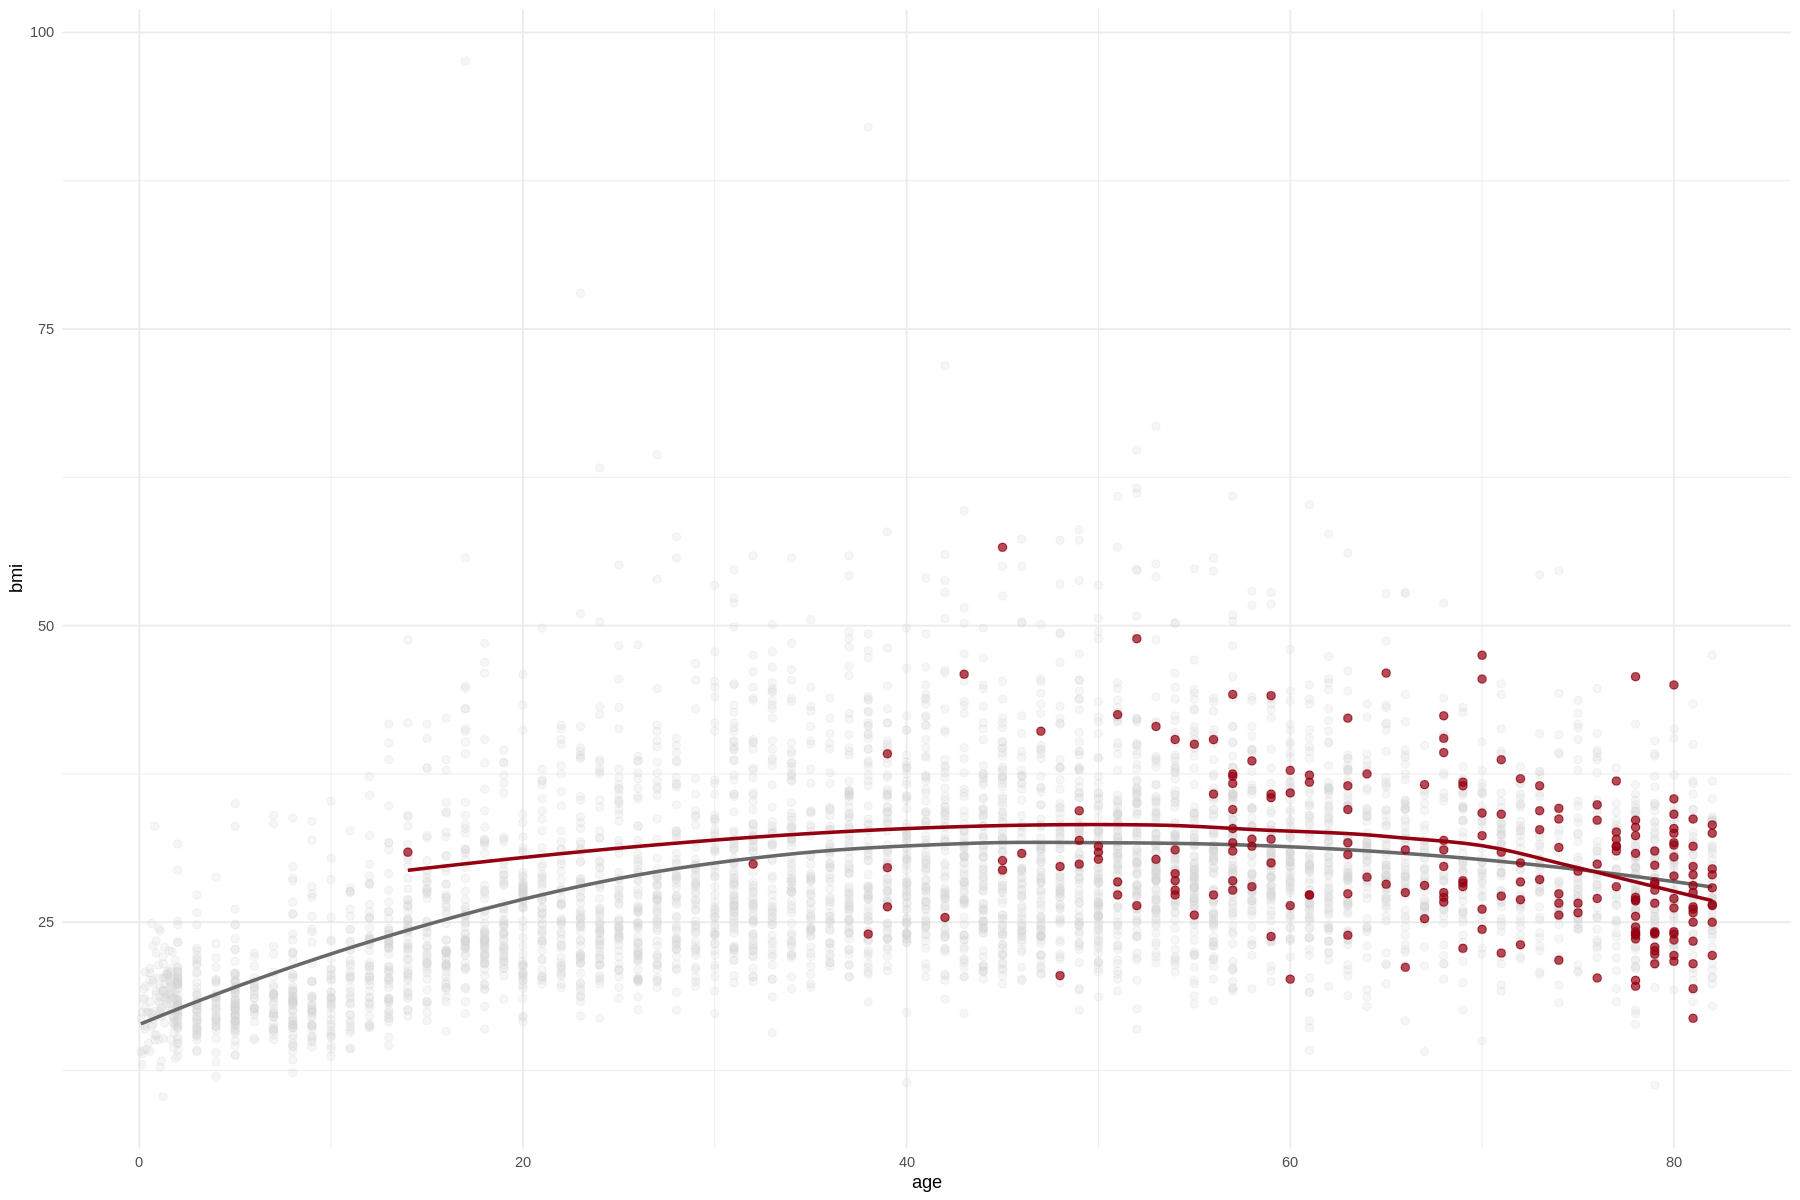

In [30]:
# bmi
ggplot(no_str_only, aes(age, bmi), fig(15, 10)) +
  geom_point(size = 2,
             alpha = 0.2,
             color = "lightgrey") +
  geom_smooth(method = "loess",
              se = FALSE,
              color = "dimgrey") +
  geom_point(data = str_only, 
             size = 2,
             alpha = 0.7,
             color="#940011") +
  geom_smooth(data = str_only,
              method = "loess",
              se = FALSE,
              color = "#940011") +
  theme_minimal()

In [ ]:
# General Overview
# gender
p_gender <- df %>% 
  filter(gender != "Other") %>% 
  group_by(stroke, gender) %>% 
  summarise(n = n()) %>% 
  mutate(prop = n/sum(n)) %>% 
  ggplot(aes(stroke, prop, fill = stroke)) + 
    geom_col(position = "dodge") +
    facet_wrap(~ gender) +
    scale_fill_manual(values = c("#fcc7c8", "#940011")) +
    theme_minimal() +
    labs(title = "Gender")

# hypertension
p_hypertension <- df %>% 
  group_by(stroke, hypertension) %>% 
  summarise(n = n()) %>% 
  mutate(prop = n/sum(n)) %>% 
  ggplot(aes(stroke, prop, fill = stroke)) +
    geom_col(position = "dodge") +
    facet_wrap(~ hypertension) + 
    scale_fill_manual(values = c("#fcc7c8", "#940011")) +
    theme_minimal() +
    labs(title = "Hypertension",
         subtitle = "0: No History / 1: History")

# heart_disease
p_heart <- df %>% 
  group_by(stroke, heart_disease) %>% 
  summarise(n = n()) %>% 
  mutate(prop = n/sum(n)) %>% 
  ggplot(aes(stroke, prop, fill = stroke)) +
    geom_col(position = "dodge") +
    facet_wrap(~ heart_disease) + 
    scale_fill_manual(values = c("#fcc7c8", "#940011")) +
    theme_minimal() +
    labs(title = "Heart Disease",
         subtitle = "0: No History / 1: History")

# ever_married
p_married <- df %>% 
  group_by(stroke, ever_married) %>% 
  summarise(n = n()) %>% 
  mutate(prop = n/sum(n)) %>% 
  ggplot(aes(stroke, prop, fill = stroke)) +
    geom_col(position = "dodge") +
    facet_wrap(~ ever_married) + 
    scale_fill_manual(values = c("#fcc7c8", "#940011")) +
    theme_minimal() +
    labs(title = "Ever-Married")

# work_type
p_work <- df %>% 
  group_by(stroke, work_type) %>% 
  summarise(n = n()) %>% 
  mutate(prop = n/sum(n)) %>% 
  ggplot(aes(stroke, prop, fill = stroke)) +
    geom_col(position = "dodge") +
    facet_wrap(~ work_type, ncol = 5) + 
    scale_fill_manual(values = c("#fcc7c8", "#940011")) +
    theme_minimal() +
    labs(title = "Work Type")

# Residence_type
p_residence <- df %>% 
  group_by(stroke, Residence_type) %>% 
  summarise(n = n()) %>% 
  mutate(prop = n/sum(n)) %>% 
  ggplot(aes(stroke, prop, fill = stroke)) +
    geom_col(position = "dodge") +
    facet_wrap(~ Residence_type) + 
    scale_fill_manual(values = c("#fcc7c8", "#940011")) +
    theme_minimal() +
    labs(title = "Residence Type")

# smoking_status
p_smoke <- df %>% 
  group_by(stroke, smoking_status) %>% 
  summarise(n = n()) %>% 
  mutate(prop = n/sum(n)) %>% 
  ggplot(aes(stroke, prop, fill = stroke)) +
    geom_col(position = "dodge") +
    facet_wrap(~ smoking_status, ncol = 4) + 
    scale_fill_manual(values = c("#fcc7c8", "#940011")) +
    theme_minimal() +
    labs(title = "Smoking Status")

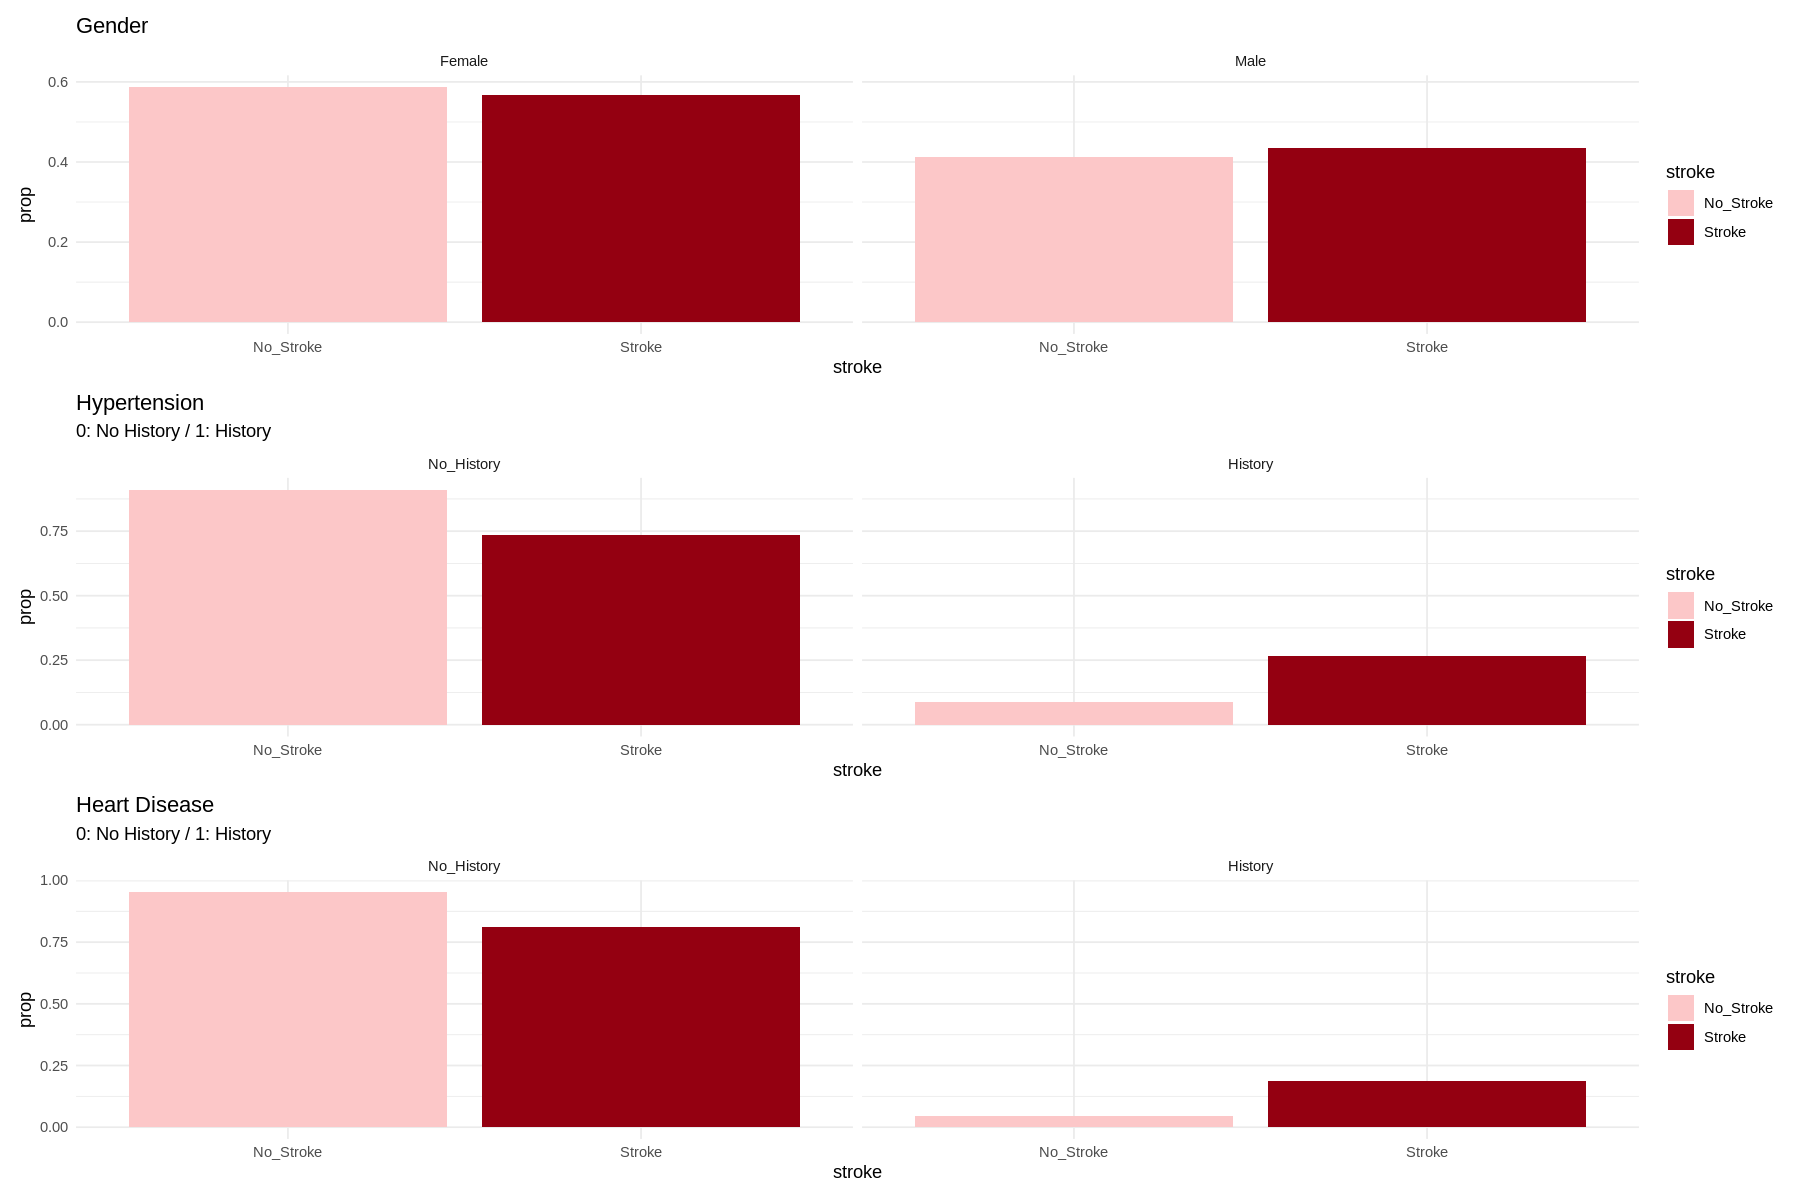

In [35]:
p_gender / p_hypertension / p_heart

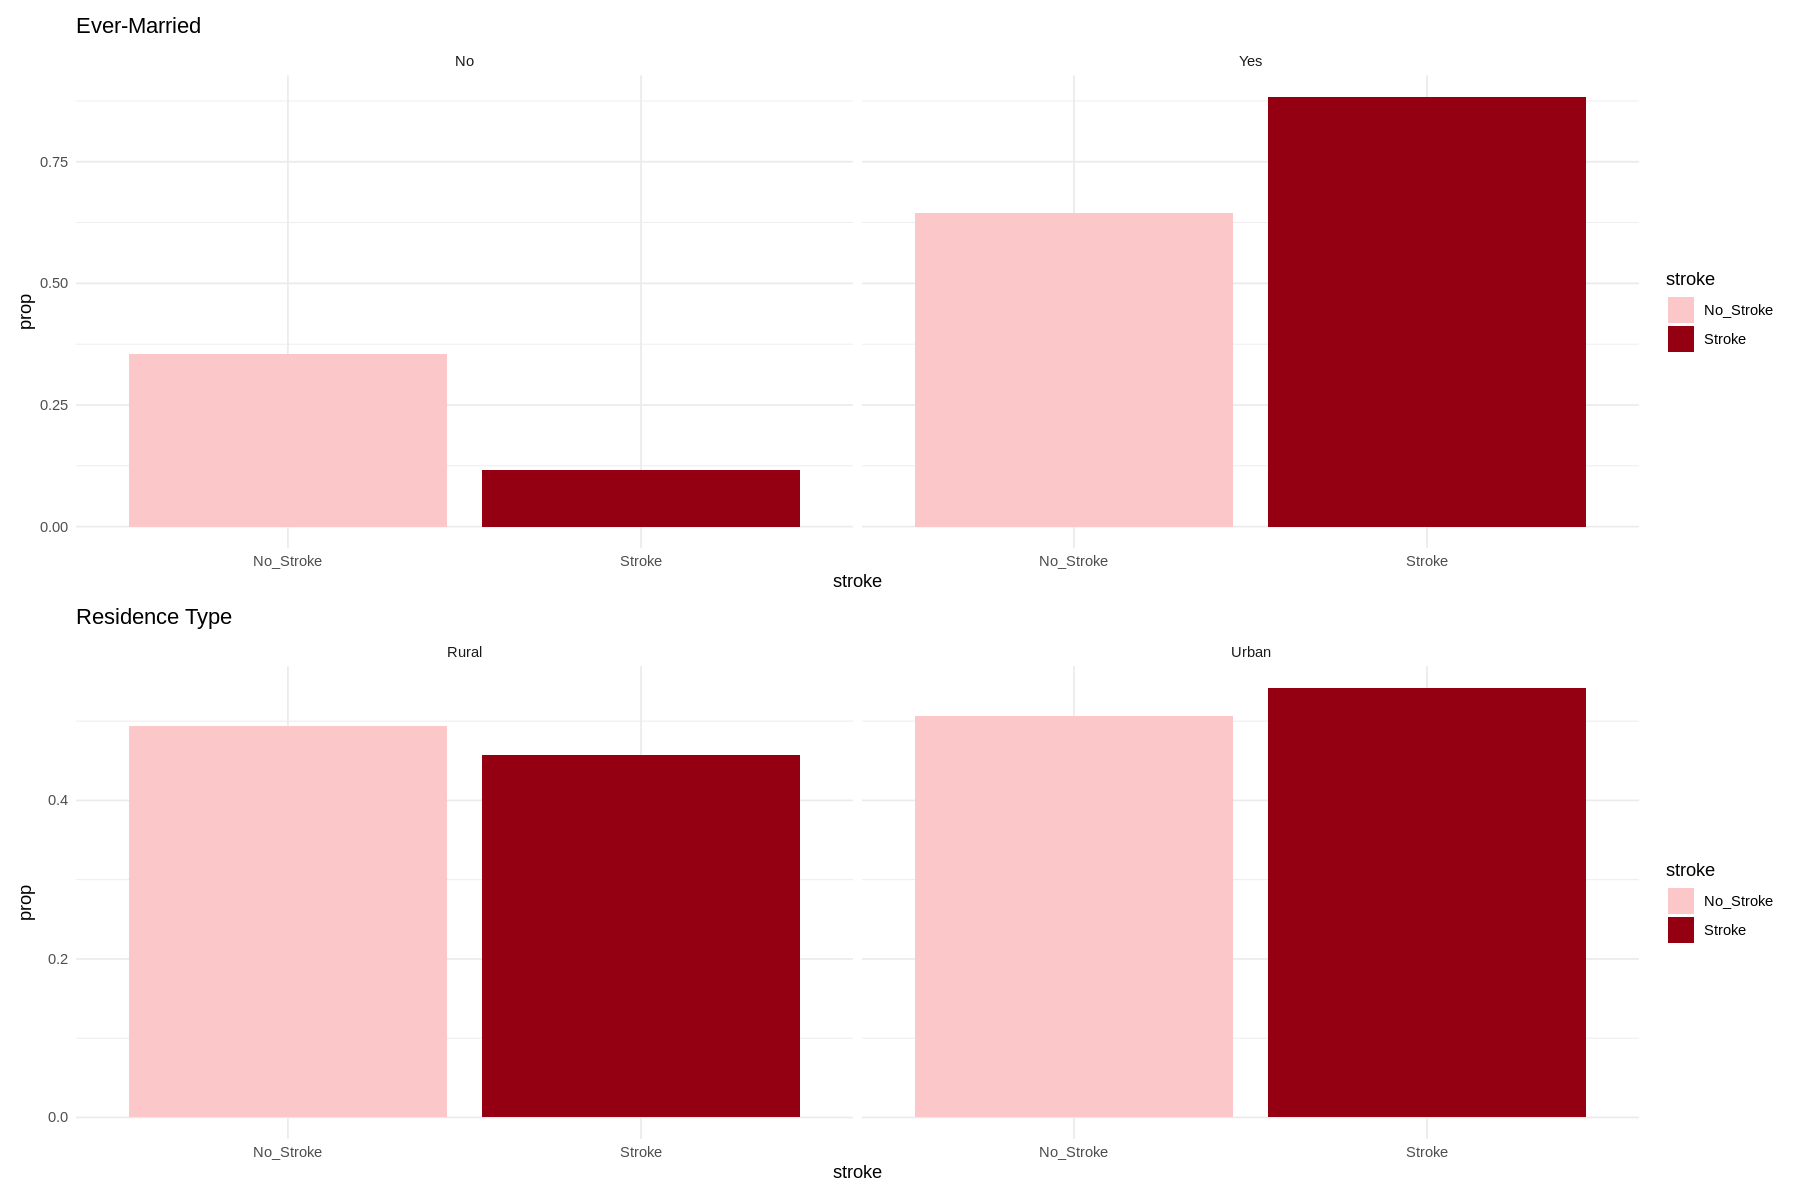

In [36]:
p_married / p_residence

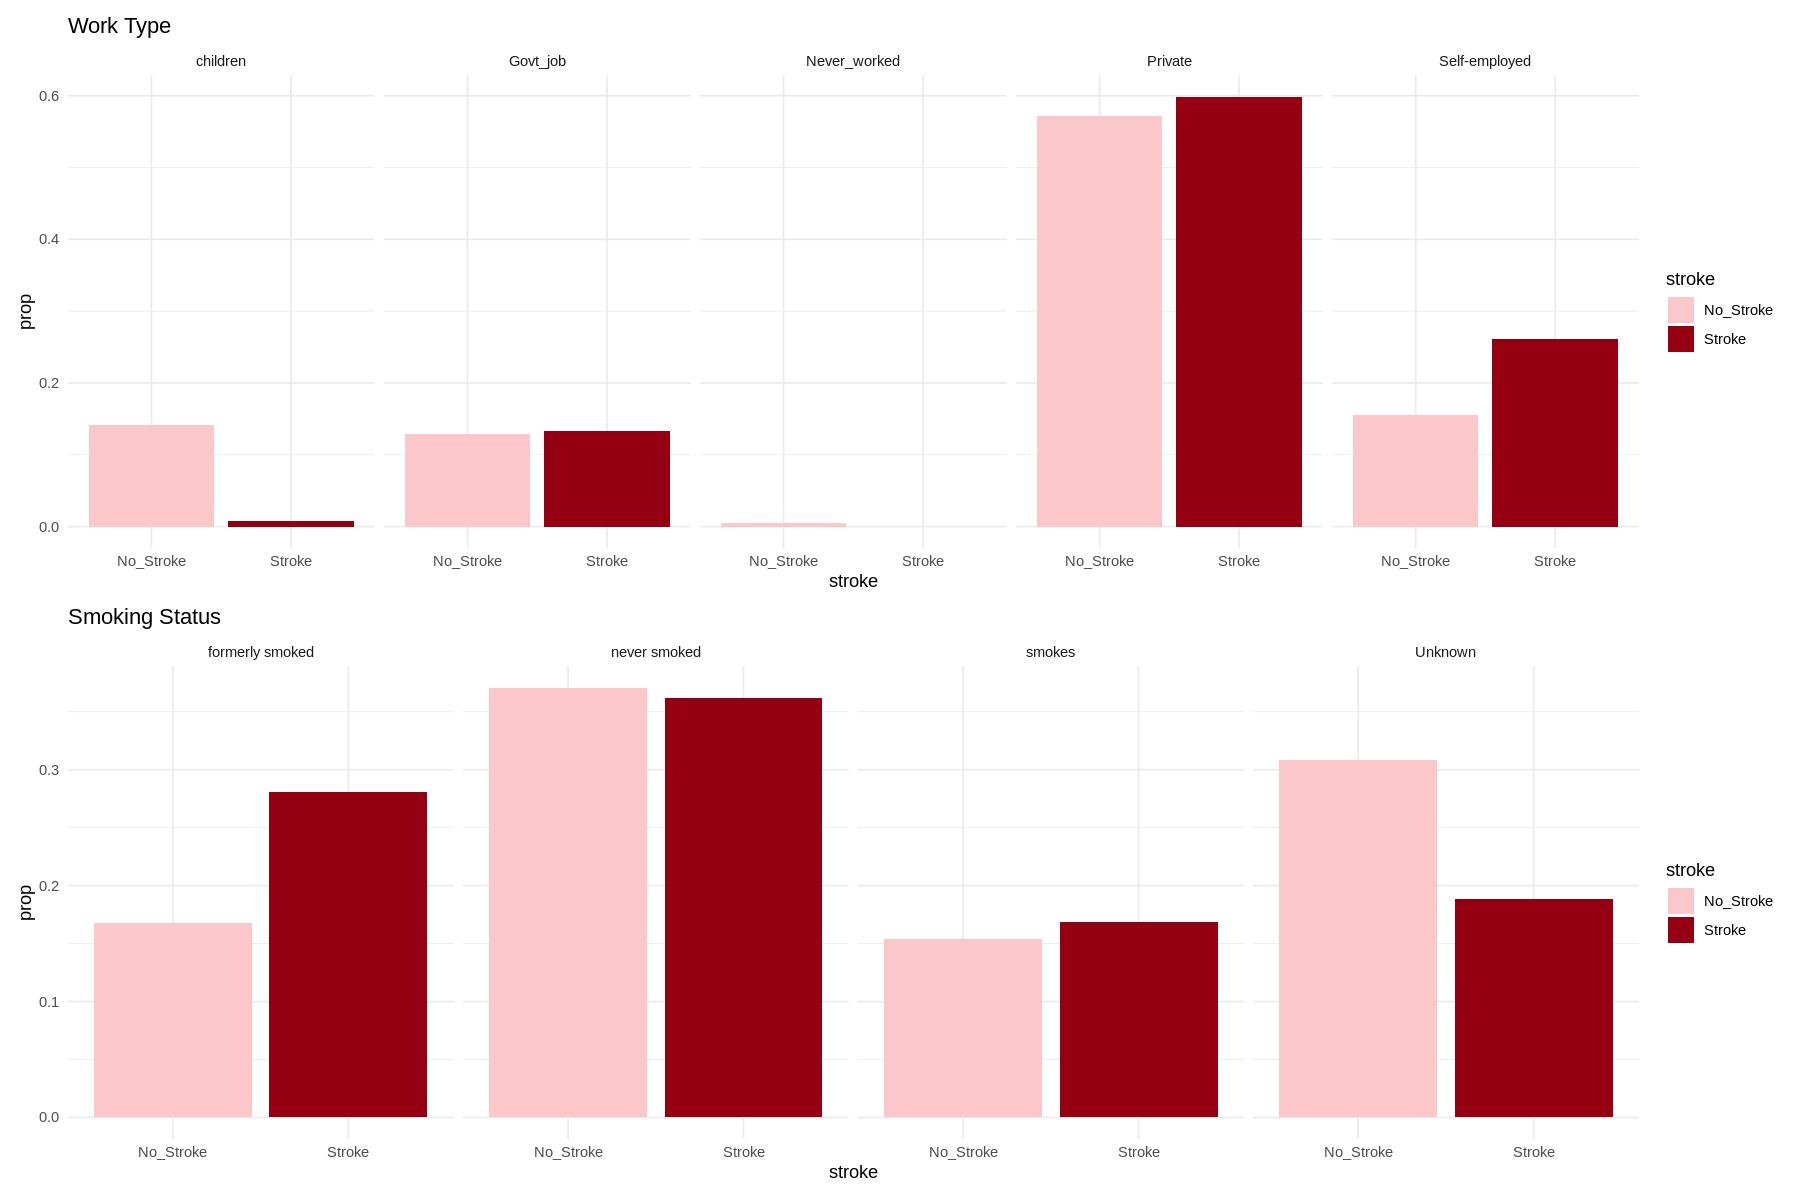

In [37]:
p_work / p_smoke